In [1]:
import sys
import re
import heapq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# functions

In [2]:

def initialize_graph(edge_list):
    graph = {}
    # read edge info and set graph {Node a: {connected node1: weight, connected node2 : weight }, Node b: ....}
    for edge_inf in edge_list:
        node1 = edge_inf[0]
        node2 = edge_inf[1]
        cost = edge_inf[2]
        graph = set_new_node(graph, node1, node2)
        graph[node1][node2] = cost
        graph[node2][node1] = cost
    return graph


def set_new_node(graph, node1, node2):
    if not node1 in graph.keys():
        graph[node1] = {}
    if not node2 in graph.keys():
        graph[node2] = {}
    return graph

# Dijkstra method for minimum cost  path
def solve_by_dijkstra(graph):
    # Minimum cost of every node from Start
    min_dist_dict = {}
    # previous node that reach to a certain node with minimum cost
    prev_node_dict = {}
    q = []
    heapq.heappush(q, (0, 'START','START'))

    prev_node = ''

    while True:
        dist, node,prev_node = heapq.heappop(q)
        min_dist_dict[node] = dist
        prev_node_dict[node] = prev_node
        # if minimum cost to GOAL is determined, finish exploration
        if node == 'GOAL': 
            return min_dist_dict, prev_node_dict
        # Calculate cost from the current node whose min cost is determined (finished-node)to movable node and add them to queue(q)
        calc_min_dist_and_put(graph, q, node, min_dist_dict, prev_node_dict)

def calc_min_dist_and_put(graph, q, departure_node, min_dist_dict, prev_node_dict):
    # iterate in movable nodes 
    for arrival_node in graph[departure_node].keys():
        # calc cost from the finished-node to movable node
        tmp_d = min_dist_dict[departure_node] + graph[departure_node][arrival_node]
        # check if the minimum cost of the arrival_node (node which we move to)is already calculated
        if arrival_node in min_dist_dict.keys():
            # Update minimum cost if it's smaller than previously calculated min-cost
            if tmp_d < min_dist_dict[arrival_node]:
                min_dist_dict[arrival_node] = tmp_d
                heapq.heappush(q, (min_dist_dict[arrival_node], arrival_node,departure_node))
        else:
            min_dist_dict[arrival_node] = tmp_d
            heapq.heappush(q, (min_dist_dict[arrival_node], arrival_node,departure_node))
    

def show_graph(edge_list):
    G = nx.Graph()

    weighs_list=[]
    for edge_info in edge_list:
        G.add_edge(edge_info[0],edge_info[1],weight=edge_info[2])
        weighs_list.append(edge_info[2])

    pos = nx.spring_layout(G)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges

    for u,v,d in G.edges(data=True):
        nx.draw_networkx_edges(G,pos,edgelist=[(u,v)],alpha=d['weight']/np.max(weighs_list),width=3)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.axis('off')
    plt.show()
    
def main():
    graph = initialize_graph(edge_list)
    min_dist_dict, prev_node_dict = solve_by_dijkstra(graph)

    print('Route : GOAL ',end='')
    node = 'GOAL'
    while True:
        if node == 'START':
            print()
            break
        print(' ← ' + prev_node_dict[node],end='')
        node = prev_node_dict[node]
    print('Min Cost : ' +  str(min_dist_dict['GOAL']))


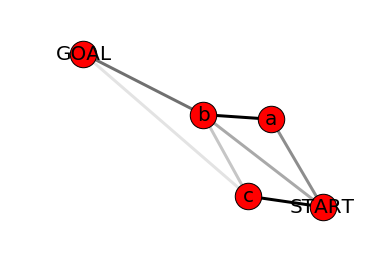

In [3]:
# all edge weights list definition (global)

edge_list=[
    ['START','a',4],
    ['START','b',3],
    ['START','c',9],
    ['a','b',9],
    ['b','c',2],
    ['b','GOAL',5],
    ['c','GOAL',1]
]

show_graph(edge_list)

In [4]:
if __name__ == '__main__':
    main()
    #sys.exit(0)

Route : GOAL  ← c ← b ← START
Min Cost : 6
